In [22]:
#Imports
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns
import matplotlib.pyplot as plt 
import psycopg2 

In [18]:
#Stocks chosen : MSFT, AAPL, ARIZ, BFI, CLS
conn = psycopg2.connect(
    host="localhost",
    database="financial_db",
    user="postgres",
    password="KaMendiNiO"
)

# Open a cursor to perform database operations
cur = conn.cursor()
data = []
stock_sample = ['MSFT', 'AAPL', 'ARIZ', 'BFI', 'CLS']
for s in stock_sample:
    #Get the tickers as a list
    query = query = '''SELECT "Date", "Close" 
            FROM public.all_time_prices 
            WHERE "Ticker" = '{}' 
            ORDER BY "Date" DESC'''.format(s)
    cur.execute(query)
    #produce a dataframe
    d = cur.fetchall()
    df = pd.DataFrame(d, columns = ['Date', 'Close'])
    data.append(df)

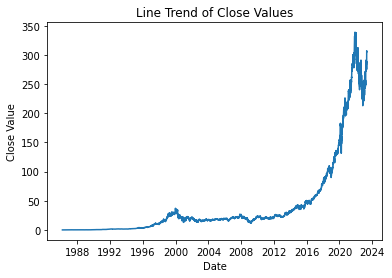

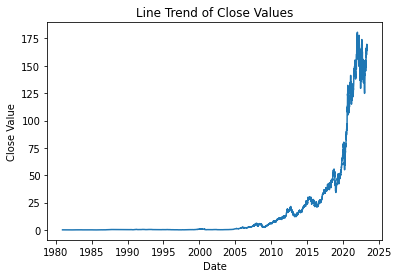

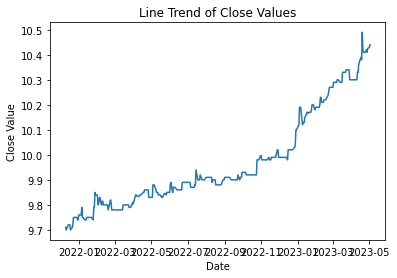

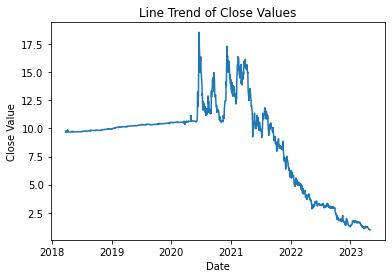

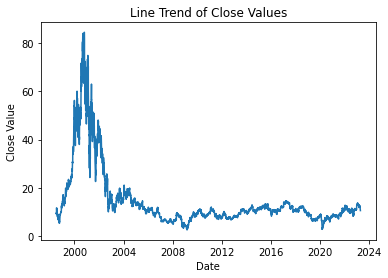

In [23]:
for d in data: 
    fig, ax = plt.subplots()
    ax.plot(d['Date'], d['Close'])
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Value')
    ax.set_title('Line Trend of Close Values')
    plt.show()
